Aprendizagem Superivsionada- Árvore de Decisão-Parte 1

In [51]:
import pandas as pd 

In [52]:
df_carros=pd.read_csv('carros.csv')
display(df_carros)

,fabricante,modelo,ano,combustivel,hp,cilindros,tipo_transmissao,tracao,num_portas,categoria,tamanho,estilo,km_por_l_estrada,km_por_l_cidade,popularidade,preco_venda,label
0,BMW,1 Series,2011,gasolina premium,300.0,6.0,MANUAL,tracao_traseira,2.0,"Luxo,Performance",compacto,Conversível,28,19,3916,40650,BMW 1 Series
1,BMW,1 Series,2011,gasolina premium,300.0,6.0,MANUAL,tracao_traseira,2.0,"Luxo,Alta-Performance",compacto,Cupê,28,20,3916,36350,BMW 1 Series
2,BMW,1 Series,2011,gasolina premium,230.0,6.0,MANUAL,tracao_traseira,2.0,"Luxo,Performance",compacto,Cupê,28,18,3916,29450,BMW 1 Series
3,BMW,1 Series,2011,gasolina premium,230.0,6.0,MANUAL,tracao_traseira,2.0,Luxo,compacto,Conversível,28,18,3916,34500,BMW 1 Series
4,BMW,1 Series,2012,gasolina premium,230.0,6.0,MANUAL,tracao_traseira,2.0,"Luxo,Performance",compacto,Cupê,28,18,3916,31200,BMW 1 Series
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Acura,ZDX,2012,gasolina premium,300.0,6.0,AUTOMATICO,quatro_por_quatro AWD,4.0,"Crossover,Hatch,Luxo",regular,4dr Hatchback,23,16,204,46120,Acura ZDX
11909,Acura,ZDX,2012,gasolina premium,300.0,6.0,AUTOMATICO,quatro_por_quatro AWD,4.0,"Crossover,Hatch,Luxo",regular,4dr Hatchback,23,16,204,56670,Acura ZDX
11910,Acura,ZDX,2012,gasolina premium,300.0,6.0,AUTOMATICO,quatro_por_quatro AWD,4.0,"Crossover,Hatch,Luxo",regular,4dr Hatchback,23,16,204,50620,Acura ZDX
11911,Acura,ZDX,2013,gasolina aditivada,300.0,6.0,AUTOMATICO,quatro_por_quatro AWD,4.0,"Crossover,Hatch,Luxo",regular,4dr Hatchback,23,16,204,50920,Acura ZDX


In [53]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11913 entries, 0 to 11912
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fabricante        11913 non-null  object 
 1   modelo            11913 non-null  object 
 2   ano               11913 non-null  int64  
 3   combustivel       11913 non-null  object 
 4   hp                11913 non-null  float64
 5   cilindros         11913 non-null  float64
 6   tipo_transmissao  11913 non-null  object 
 7   tracao            11913 non-null  object 
 8   num_portas        11913 non-null  float64
 9   categoria         11913 non-null  object 
 10  tamanho           11913 non-null  object 
 11  estilo            11913 non-null  object 
 12  km_por_l_estrada  11913 non-null  int64  
 13  km_por_l_cidade   11913 non-null  int64  
 14  popularidade      11913 non-null  int64  
 15  preco_venda       11913 non-null  int64  
 16  label             11913 non-null  object

In [54]:
df_carros.isnull().sum()

fabricante          0
modelo              0
ano                 0
combustivel         0
hp                  0
cilindros           0
tipo_transmissao    0
tracao              0
num_portas          0
categoria           0
tamanho             0
estilo              0
km_por_l_estrada    0
km_por_l_cidade     0
popularidade        0
preco_venda         0
label               0
dtype: int64

In [55]:
#Converta todas as colunas para tipo categoria
for coluna in df_carros.columns:
    df_carros[coluna]=df_carros[coluna].astype('category')

In [56]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11913 entries, 0 to 11912
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   fabricante        11913 non-null  category
 1   modelo            11913 non-null  category
 2   ano               11913 non-null  category
 3   combustivel       11913 non-null  category
 4   hp                11913 non-null  category
 5   cilindros         11913 non-null  category
 6   tipo_transmissao  11913 non-null  category
 7   tracao            11913 non-null  category
 8   num_portas        11913 non-null  category
 9   categoria         11913 non-null  category
 10  tamanho           11913 non-null  category
 11  estilo            11913 non-null  category
 12  km_por_l_estrada  11913 non-null  category
 13  km_por_l_cidade   11913 non-null  category
 14  popularidade      11913 non-null  category
 15  preco_venda       11913 non-null  category
 16  label             1191

In [57]:
display(df_carros)

,fabricante,modelo,ano,combustivel,hp,cilindros,tipo_transmissao,tracao,num_portas,categoria,tamanho,estilo,km_por_l_estrada,km_por_l_cidade,popularidade,preco_venda,label
0,BMW,1 Series,2011,gasolina premium,300.0,6.0,MANUAL,tracao_traseira,2.0,"Luxo,Performance",compacto,Conversível,28,19,3916,40650,BMW 1 Series
1,BMW,1 Series,2011,gasolina premium,300.0,6.0,MANUAL,tracao_traseira,2.0,"Luxo,Alta-Performance",compacto,Cupê,28,20,3916,36350,BMW 1 Series
2,BMW,1 Series,2011,gasolina premium,230.0,6.0,MANUAL,tracao_traseira,2.0,"Luxo,Performance",compacto,Cupê,28,18,3916,29450,BMW 1 Series
3,BMW,1 Series,2011,gasolina premium,230.0,6.0,MANUAL,tracao_traseira,2.0,Luxo,compacto,Conversível,28,18,3916,34500,BMW 1 Series
4,BMW,1 Series,2012,gasolina premium,230.0,6.0,MANUAL,tracao_traseira,2.0,"Luxo,Performance",compacto,Cupê,28,18,3916,31200,BMW 1 Series
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Acura,ZDX,2012,gasolina premium,300.0,6.0,AUTOMATICO,quatro_por_quatro AWD,4.0,"Crossover,Hatch,Luxo",regular,4dr Hatchback,23,16,204,46120,Acura ZDX
11909,Acura,ZDX,2012,gasolina premium,300.0,6.0,AUTOMATICO,quatro_por_quatro AWD,4.0,"Crossover,Hatch,Luxo",regular,4dr Hatchback,23,16,204,56670,Acura ZDX
11910,Acura,ZDX,2012,gasolina premium,300.0,6.0,AUTOMATICO,quatro_por_quatro AWD,4.0,"Crossover,Hatch,Luxo",regular,4dr Hatchback,23,16,204,50620,Acura ZDX
11911,Acura,ZDX,2013,gasolina aditivada,300.0,6.0,AUTOMATICO,quatro_por_quatro AWD,4.0,"Crossover,Hatch,Luxo",regular,4dr Hatchback,23,16,204,50920,Acura ZDX


In [58]:
#Substituindo valores categóricos para numéricos
for coluna in df_carros.columns:
    df_carros[coluna]=df_carros[coluna].cat.codes

In [59]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11913 entries, 0 to 11912
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   fabricante        11913 non-null  int8 
 1   modelo            11913 non-null  int16
 2   ano               11913 non-null  int8 
 3   combustivel       11913 non-null  int8 
 4   hp                11913 non-null  int16
 5   cilindros         11913 non-null  int8 
 6   tipo_transmissao  11913 non-null  int8 
 7   tracao            11913 non-null  int8 
 8   num_portas        11913 non-null  int8 
 9   categoria         11913 non-null  int8 
 10  tamanho           11913 non-null  int8 
 11  estilo            11913 non-null  int8 
 12  km_por_l_estrada  11913 non-null  int8 
 13  km_por_l_cidade   11913 non-null  int8 
 14  popularidade      11913 non-null  int8 
 15  preco_venda       11913 non-null  int16
 16  label             11913 non-null  int16
dtypes: int16(4), int8(13)
memory us

In [60]:
display(df_carros)

,fabricante,modelo,ano,combustivel,hp,cilindros,tipo_transmissao,tracao,num_portas,categoria,tamanho,estilo,km_por_l_estrada,km_por_l_cidade,popularidade,preco_venda,label
0,4,0,21,7,195,4,3,3,0,68,0,4,16,12,46,3929,65
1,4,0,21,7,195,4,3,3,0,65,0,5,16,13,46,3479,65
2,4,0,21,7,139,4,3,3,0,68,0,5,16,11,46,2546,65
3,4,0,21,7,139,4,3,3,0,64,0,4,16,11,46,3245,65
4,4,0,22,7,139,4,3,3,0,68,0,5,16,11,46,2798,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,0,900,22,7,195,4,0,1,2,19,2,2,11,9,11,4371,17
11909,0,900,22,7,195,4,0,1,2,19,2,2,11,9,11,4878,17
11910,0,900,22,7,195,4,0,1,2,19,2,2,11,9,11,4627,17
11911,0,900,23,5,195,4,0,1,2,19,2,2,11,9,11,4641,17


In [61]:
df_carros.loc[:,'ano':]

,ano,combustivel,hp,cilindros,tipo_transmissao,tracao,num_portas,categoria,tamanho,estilo,km_por_l_estrada,km_por_l_cidade,popularidade,preco_venda,label
0,21,7,195,4,3,3,0,68,0,4,16,12,46,3929,65
1,21,7,195,4,3,3,0,65,0,5,16,13,46,3479,65
2,21,7,139,4,3,3,0,68,0,5,16,11,46,2546,65
3,21,7,139,4,3,3,0,64,0,4,16,11,46,3245,65
4,22,7,139,4,3,3,0,68,0,5,16,11,46,2798,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,22,7,195,4,0,1,2,19,2,2,11,9,11,4371,17
11909,22,7,195,4,0,1,2,19,2,2,11,9,11,4878,17
11910,22,7,195,4,0,1,2,19,2,2,11,9,11,4627,17
11911,23,5,195,4,0,1,2,19,2,2,11,9,11,4641,17


In [62]:
df_carros.to_csv('carros_categoria.csv',index=False) #Salvando as alterações no arquivo carros_categoria.csv

Preparação, Sepraração dos Dados e Treinamento de uma DT

In [63]:
df_clientes=pd.read_csv(r'C:\Users\monte\OneDrive\Documentos\python\dados_clientes_nome.csv')

In [64]:
display(df_clientes)

,nome,idade,nacionalidade,altura,peso,sexo,gosta de futebol,salario
0,Aldo,22,0,1.70,75,0,1,2500
1,Beto,52,1,1.75,80,0,1,2500
2,Bia,31,1,1.50,65,1,1,4500
3,Carlos,65,1,1.95,86,0,0,6500
4,Diego,17,0,1.81,95,0,1,1500
5,Daina,54,0,1.65,80,1,0,3500
6,Carol,30,0,1.90,105,1,1,1200
7,Fabia,25,1,1.85,65,1,1,2245
8,Felix,49,0,1.71,75,0,0,25000
9,Gaia,26,1,1.81,80,1,1,8000


In [65]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
#Treina um algprítmo de árvore de decisão
from sklearn import tree
atributos=df_clientes.drop(['nome','gosta de futebol'],axis=1)
X_treino=atributos.to_numpy()
y_treino=df_clientes['gosta de futebol'].to_numpy()

In [67]:
clf=tree.DecisionTreeClassifier()

In [68]:
clf=clf.fit(X_treino,y_treino)

In [69]:
#validação cruzada
from sklearn.model_selection import cross_val_score
import numpy as np
scores=cross_val_score(clf,X_treino,y_treino,cv=3)
Media=scores.mean()
print('Acurácia:',Media)

Acurácia: 0.4444444444444444


                      precision    recall  f1-score   support

Não gosta de futebol       0.50      0.33      0.40         3
    Gosta de futebol       0.75      0.86      0.80         7

            accuracy                           0.70        10
           macro avg       0.62      0.60      0.60        10
        weighted avg       0.68      0.70      0.68        10



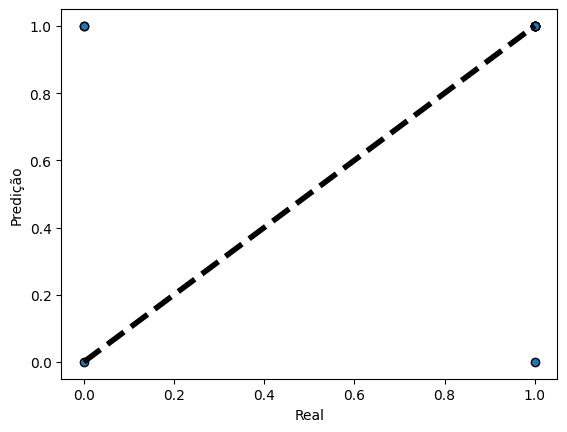

In [72]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

cv_results = cross_val_predict(clf, X_treino, y_treino, cv=3)

print(classification_report(y_treino, cv_results, target_names=categorias_gosta_futebol))

fig, ax = plt.subplots()
ax.scatter(y_treino, cv_results, edgecolors=(0, 0, 0))
ax.plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

# Lê o dataset de carros
carros = pd.read_csv("carros_categoria.csv")

carros

,fabricante,modelo,ano,combustivel,hp,cilindros,tipo_transmissao,tracao,num_portas,categoria,tamanho,estilo,km_por_l_estrada,km_por_l_cidade,popularidade,preco_venda,label
0,4,0,21,7,195,4,3,3,0,68,0,4,16,12,46,3929,65
1,4,0,21,7,195,4,3,3,0,65,0,5,16,13,46,3479,65
2,4,0,21,7,139,4,3,3,0,68,0,5,16,11,46,2546,65
3,4,0,21,7,139,4,3,3,0,64,0,4,16,11,46,3245,65
4,4,0,22,7,139,4,3,3,0,68,0,5,16,11,46,2798,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,0,900,22,7,195,4,0,1,2,19,2,2,11,9,11,4371,17
11909,0,900,22,7,195,4,0,1,2,19,2,2,11,9,11,4878,17
11910,0,900,22,7,195,4,0,1,2,19,2,2,11,9,11,4627,17
11911,0,900,23,5,195,4,0,1,2,19,2,2,11,9,11,4641,17


In [74]:
# Seleciona apenas as colunas necessárias
X = carros.loc[:, 'ano':'preco_venda'].to_numpy()

y = carros['label'].to_numpy()

In [75]:
# Divide o conjunto em treinamento e teste, na proporção 80-20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25,                                                         
                                                        random_state=123, 
                                                        shuffle=True)

caracteristicas = list(carros.columns[2:-1])

carros['fabricante'] = carros ['fabricante'].astype('category')

categorias = carros['fabricante'].cat.categories

print("Tamanho do conjunto de treinamento: {}".format(len(X_treino)))
print("Tamanho do conjunto de testes: {}".format(len(X_teste)))
print("Quantidade de características: {}".format(len(caracteristicas)))
print("Quantidade de classes ou categorias: {}".format(len(carros ['fabricante'].cat.categories)))

Tamanho do conjunto de treinamento: 8934
Tamanho do conjunto de testes: 2979
Quantidade de características: 14
Quantidade de classes ou categorias: 48


In [77]:
#Conta a quantidade de categorias de serviço
df_antigo=pd.read_csv('carros.csv')
categ_count = df_antigo['fabricante'].value_counts()
print(str(categ_count))

fabricante
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               333
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5

In [82]:
clf = tree.DecisionTreeClassifier(criterion = "gini", splitter = "best", 
                                  max_depth = 3,  min_samples_split = 5,
                                  min_samples_leaf = 2, max_features = 2)

clf_gini_best = clf.fit(X_treino, y_treino)

In [83]:
# Avalia o desempenho do modelo treinado
import numpy as np
from sklearn.metrics import classification_report

y_pred = clf_gini_best.predict(X_teste)


c:\Users\monte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


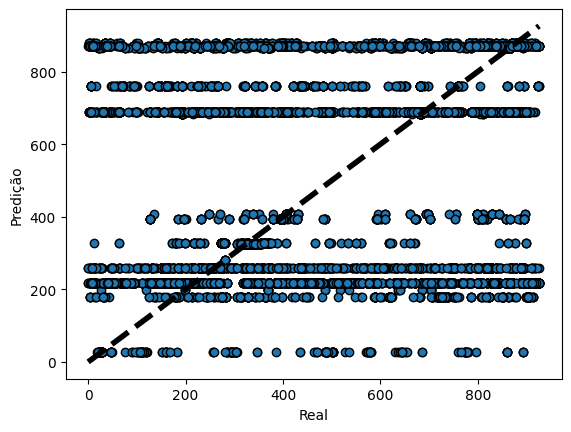

In [88]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

cv_results = cross_val_predict(clf, X_treino, y_treino, cv=3)

fig, ax = plt.subplots()
ax.scatter(y_treino, cv_results, edgecolors=(0, 0, 0))
ax.plot([y_treino.min(), y_treino.max()], [y_treino.min(), y_treino.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predição')
plt.show()